# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [59]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
sn.set()


In [60]:
# leer conjuntos de datos en los DataFrames

inst_order = pd.read_csv("instacart_orders.csv", sep= ";")
products = pd.read_csv("products.csv", sep= ";")
aisles = pd.read_csv("aisles.csv", sep= ";")
depts = pd.read_csv("departments.csv", sep= ";")
ord_prod = pd.read_csv("order_products.csv", sep= ";")

In [61]:
# mostrar información del DataFrame
#data = [inst_order,product,aisles,depts,ord_prod]

inst_order.info()
print()
inst_order.head()
inst_order.duplicated().sum()

#dartos perdidos en col 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



15

In [62]:
# mostrar información del DataFrame
products.info()
print()
products.head()

#datos perdidos en col 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [63]:
# mostrar información del DataFrame
aisles.info()
print()
aisles.head()

#no datos perdidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [64]:
# mostrar información del DataFrame
depts.info()
print()
depts.head()

#no perdidos :D 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes



department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [65]:
# mostrar información del DataFrame
ord_prod.info(show_counts=True)
print()
ord_prod.head()

#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

## Conclusiones


hay valores perdidos en: 
- la lista de ordenes, en la columna de días desde la orden
- la lista de productos, en el nombre del producto

en la lista de productos podemos a priori prescindir de esa info. 
mientras que los días desde la orden, habría que investigar a que se debe, sin embargo puede establecerse un valor arbitrario, un promedio, o simplemente descartar esas ordenes. 

La en la ultima tabla no se muestran los valores no nulos, habra que hacer una investigacion manual de ello.

# Paso 2. Preprocesamiento de los datos


Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.


Se busca si existen valores duplicados y se explora las bases

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [66]:
# Revisa si hay pedidos duplicados
print(inst_order.duplicated().sum())
print()
print(inst_order[inst_order.duplicated()].sort_values(by="user_id"))

#order_dp = inst_order[inst_order.duplicated()]["order_id"]
#print(order_dp)

15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
441599   2125197    14050            48          3                  2   
284038   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
321100    408114    68324             4          3                  2   
345917   2232988    82565             1          3                  2   
415163   2282673    86751            49          3                  2   
266232   1782114   106752             1          3                  2   
223105   2160484   107525            16          3                  2   
411408   1286742   183220            48          3                  2   
230807   1918001   188546            14        

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [67]:
# Basándote en tus hallazgos,
"""Una revision detallada revela que existen 15 duplicados dentro del df por lo que lo ideal es eliminarlos ya que son los mismos pedidos con indices distintos """
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
inst_order[(inst_order["order_dow"]== 3 ) & (inst_order["order_hour_of_day"] == 2)]
#inst_order[(inst_order["order_dow"]== 3 ) & (inst_order["order_hour_of_day"] == 2)].query("order_id in @order_dp")

order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                      7.0  
18420                     11.0  
24691                      9.0  
...                        ...  
457013                    30.0  
458816                     4.0  
459635                    21.0  
468324                     3.0  
477526                     3.0  

[121 rows x 6 columns]

¿Qué sugiere este resultado?

In [68]:
# Elimina los pedidos duplicados
inst_order.drop_duplicates(inplace=True)

In [69]:
# Vuelve a verificar si hay filas duplicadas
print(inst_order.duplicated().sum())


0


In [70]:
# Vuelve a verificar si hay IDs duplicados de pedidos
inst_order[inst_order.duplicated()]["order_id"]

Series([], Name: order_id, dtype: int64)

Describe brevemente tus hallazgos y lo que hiciste con ellos

se encuentran filas duplicadas, se examinan y se eliminan al ser duplicados reales

### `products` data frame

In [71]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())


0


In [72]:
# Verifica si hay IDs duplicadas de productos
products["product_id"].duplicated().sum()

0

In [73]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"].str.upper().duplicated().sum()

1361

In [74]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~products["product_name"].isna()]["product_name"].str.upper().duplicated().sum()


#products[products[~products["product_name"].isna()]["product_name"].str.upper().duplicated()]



104

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encuentran nombres de productos faltantes, al no ser datos relevantes se omite cambiar los valores por un nombre estandalizado como "desconocido"

### `departments` data frame

In [75]:
# Revisa si hay filas totalmente duplicadas
print(depts.duplicated().sum())




0


In [76]:
# Revisa si hay IDs duplicadas de productos
depts["department_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encuentran duplicados en los datos

### `aisles` data frame

In [77]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())


0


In [78]:
# Revisa si hay IDs duplicadas de productos
aisles["aisle_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encuentran duplicados en los datos

### `order_products` data frame

In [79]:
# Revisa si hay filas totalmente duplicadas
print(ord_prod.duplicated().sum())

0


In [80]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(ord_prod["order_id"].duplicated().sum())
print(ord_prod[ord_prod["order_id"].duplicated()])

print(ord_prod["product_id"].duplicated().sum())
print(ord_prod[ord_prod["product_id"].duplicated()])

4094961
         order_id  product_id  add_to_cart_order  reordered
367       2867619       48094                9.0          0
824        844425       39408               10.0          1
1124      3319857       37067               19.0          0
1258      1038788       12471               14.0          0
1303      2825714       44632               16.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4094961 rows x 4 columns]
4499434
         order_id  product_id  add_to_cart_order  reordered
19        2500729       21616                5.0          1
20        1687771       22963                5.0          1
75        2186234       13176                2.0        

Describe brevemente tus hallazgos y lo que hiciste con ellos.

aunque existen "duplicados" se refieren a productos reordenados, se omite ya que es posible que un producto pueda ser comrpado mas de una vez y una orden contenga mas de un producto

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [81]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products["product_name"].isna()]


product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

Describe brevemente cuáles son tus hallazgos.
se encuentran productos aunsentes todos del pasillo  100 y departamento 21


In [82]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products["product_name"].isna()]["aisle_id"].nunique()
#




1

Describe brevemente cuáles son tus hallazgos.

Si todos son pasillo 100, es posible que exista un error dentro del inventario, lo adecuado es reportar para poder asignar los nombres correspondientes

In [83]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products["product_name"].isna()]["department_id"].nunique()

#

1

Describe brevemente cuáles son tus hallazgos.

Ídem, todo esta relacionado con el depto 21

In [84]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles.query("aisle_id == 10"))
print()
print(depts.query("department_id == 21"))

   aisle_id             aisle
9        10  kitchen supplies

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [85]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"].fillna("Unknown", inplace=True)
products[products["product_name"].isna()]


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

Describe brevemente tus hallazgos y lo que hiciste con ellos.

se cambian los tosos a desconocido para tener un nombre uniforme

### `orders` data frame

In [86]:
# Encuentra los valores ausentes
inst_order.isna().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [87]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
inst_order[inst_order["days_since_prior_order"].isna()]#["order_number"].max()



order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                        NaN  
103                        NaN  
104                        NaN  
...                        ...  
478895                     NaN  
478896                     NaN  
478922                     NaN  
478926                     NaN  
478945                     NaN  

[28817 rows x 6 columns]

Describe brevemente tus hallazgos y lo que hiciste con ellos.

todos los pedidos con datos ausentes corresponden al primer pedido del cliente, es posible cambiarlo a 0, se decide no hacerlo ya podria ser posible confundir ese dato en caso de que se haga un analisis por dias entre pedidos y olvidar el detalle de filtrar los primeros pedidos y/o tomarlos como punto de partida 


### `order_products` data frame

In [88]:
# Encuentra los valores ausentes
print(ord_prod.isna().sum())
print()
print(ord_prod[ord_prod["add_to_cart_order"].isna()])

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [89]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Min", ord_prod["add_to_cart_order"].min(),"Max",ord_prod["add_to_cart_order"].max())

Min 1.0 Max 64.0


Describe brevemente cuáles son tus hallazgos.

se encuentra que todos los medidos tienen un maximo de 64 productos por orden registrados 

In [90]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orden_NA = ord_prod[ord_prod["add_to_cart_order"].isna()]["order_id"].unique()
print(orden_NA)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [91]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
ord_prod[ord_prod["order_id"].isin(orden_NA)].groupby("order_id")["product_id"].count().sort_values()


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

se encuentra que todos los pedidos con datos ausentes tienen mas de 64 pedidos, debe ser una limitacion del sistema 

In [92]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

ord_prod.fillna({"add_to_cart_order": 999}, inplace=True)

ord_prod["add_to_cart_order"] = ord_prod["add_to_cart_order"].astype("int")
ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

se hace la correccion a 999, y se establece como valor para desconocido

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [93]:
print(inst_order.iloc[:,3:5].describe())

           order_dow  order_hour_of_day
count  478952.000000      478952.000000
mean        2.775051          13.447034
std         2.045901           4.224567
min         0.000000           0.000000
25%         1.000000          10.000000
50%         3.000000          13.000000
75%         5.000000          16.000000
max         6.000000          23.000000


Escribe aquí tus conclusiones
Se encuentra que los datos son razonebles a lo esperado 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

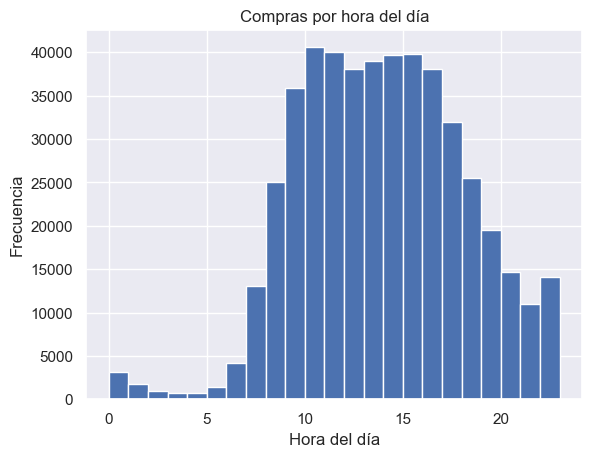

In [94]:


inst_order["order_hour_of_day"].plot(kind="hist",bins= 23, title = "Compras por hora del día", ylabel="Frecuencia", xlabel="Hora del día")
plt.show()


Escribe aquí tus conclusiones

se encuentra que los horarios entorno al medio dia son mas comunes para realizar pedidos

### [A3] ¿Qué día de la semana compran víveres las personas?

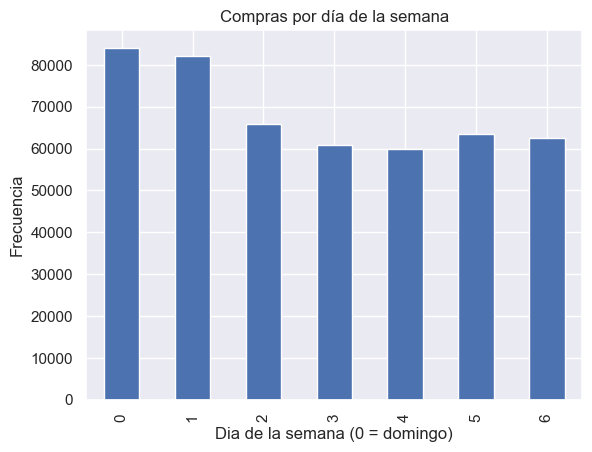

In [95]:
""" inst_order["order_dow"].plot(kind="hist", bins= 6, title= "Compras por día de la semana", ylabel="Frecuencia", xlabel="Dia de la semana (0 = domingo)")
plt.show() """

inst_order["order_dow"].value_counts().sort_index().plot(kind="bar",title= "Compras por día de la semana", ylabel="Frecuencia", xlabel="Dia de la semana (0 = domingo)")
plt.show()

Escribe aquí tus conclusiones

Los dias domingos es mas comiun realizar las comrpas 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

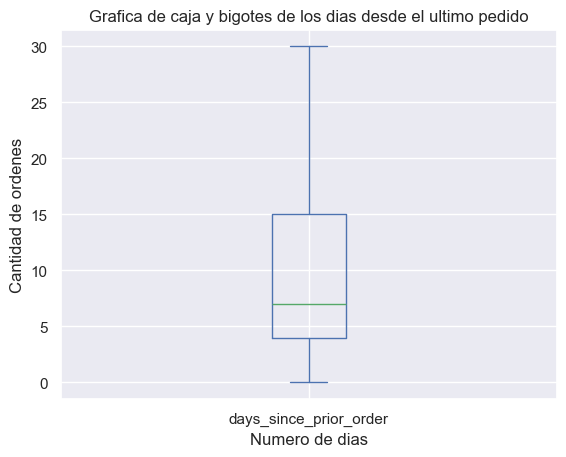

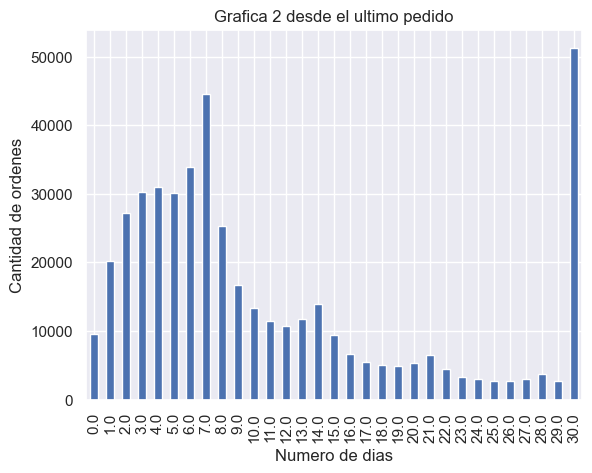

In [96]:
inst_order["days_since_prior_order"].plot(kind="box", title="Grafica de caja y bigotes de los dias desde el ultimo pedido",ylabel="Cantidad de ordenes", xlabel="Numero de dias")
plt.show()

inst_order["days_since_prior_order"].value_counts().sort_index().plot(kind="bar", title="Grafica 2 desde el ultimo pedido" ,ylabel="Cantidad de ordenes", xlabel="Numero de dias")
plt.show()

Escribe aquí tus conclusiones

Se observa que la gente suele comrpar mas comunmente una vez al mes y/o una vez a la semana

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [97]:
datitos = inst_order[(inst_order["order_dow"]== 3) | (inst_order["order_dow"]== 6)]

instacart_df = pd.DataFrame({
    'Miercoles': datitos[datitos["order_dow"]==3]["order_hour_of_day"].value_counts().sort_index(),
    'Sabado': datitos[datitos["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index()
})

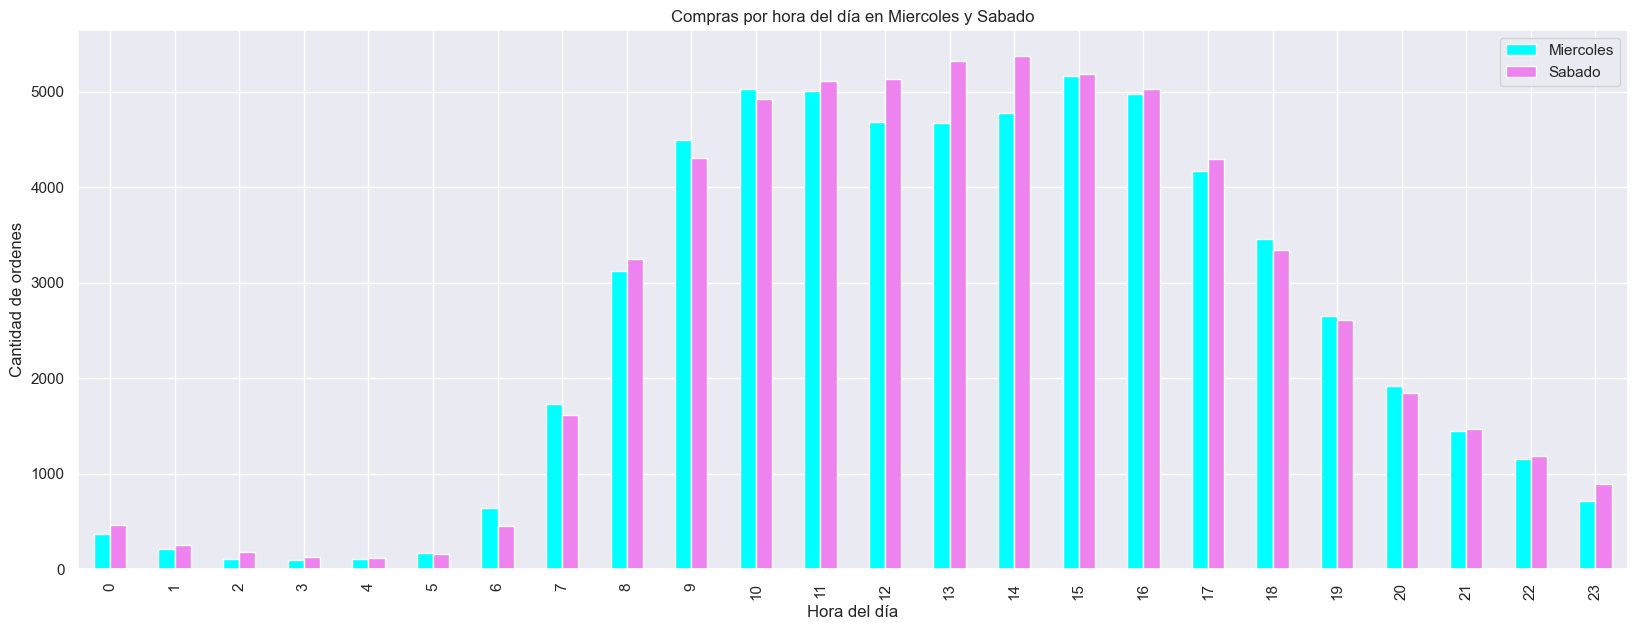

In [98]:
instacart_df.plot(kind="bar", color= ["cyan", "violet"], figsize=(20, 7), title= "Compras por hora del día en Miercoles y Sabado", xlabel="Hora del día", ylabel="Cantidad de ordenes")
plt.show()

Escribe aquí tus conclusiones

Aparentemente no hay difernecias, seria importante realizar un contraste de medias para saber si la diferencia es significativa, aunque es posible que no lo sea 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

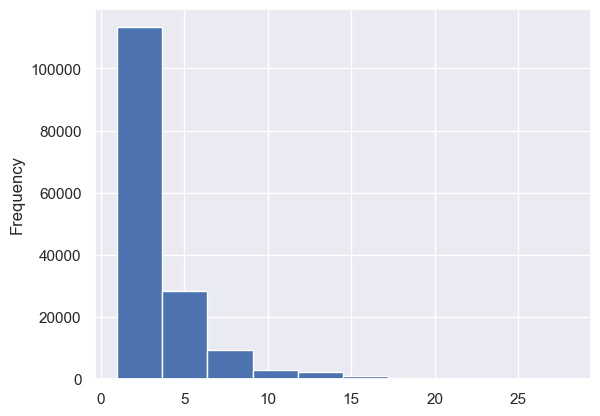

In [99]:

ordenes = inst_order.groupby("user_id")["order_id"].count()
ordenes.plot(kind= "hist", bins=10)
plt.show()

In [100]:
#por recomendacion del tutor en coolernig se intenta hacer la grafica con Ploty
import plotly.express as px
fig = px.histogram(ordenes, x="order_id", title="Distibucion")
fig.update_layout(
    xaxis_title_text = 'Cantidad de pedidos', 
    yaxis_title_text = 'Pedidos por cliente'
    )
fig.show()

Escribe aquí tus conclusiones

se observa que la mayoria de los usuarios ha realizado al menos un pedido, sertia importante abordar la razon opor la que no repiten los pedidos 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

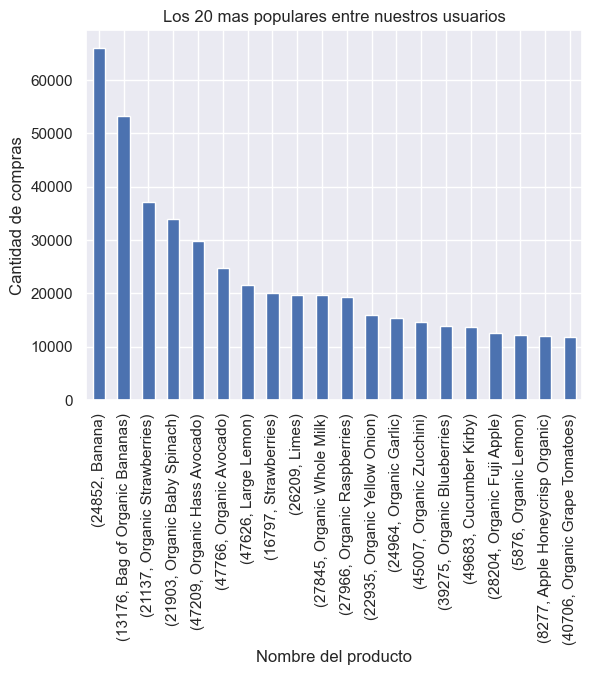

In [101]:
#merge entre ordenes y productos
#grpu by nom prodct, id de prod

ord_mrg = ord_prod.merge(products, on= "product_id")
vnte_mjrs = ord_mrg.groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending= False).head(20)
#hacemos la grafica:
vnte_mjrs.plot(kind="bar", x="product_name", y= "count", title="Los 20 mas populares entre nuestros usuarios", xlabel="Nombre del producto",ylabel="Cantidad de compras")
plt.show()
#print(bar_ord)
del vnte_mjrs

Escribe aquí tus conclusiones


 se observa que los pedidos mas comunes son frutas y verduras 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [102]:
#merge entre ordenes y pedidos, gruput by entre 
#hacer conteo entre clientes y ordenes, 
#hacer un hist y la media
carlos = inst_order.merge(ord_mrg, on= "order_id")
ord_cli_x_ped = carlos.groupby(["order_id"])["product_id"].count()
print("pedidos aleatorios para ejemplificar")
print(ord_cli_x_ped)
print()
print("Media por pedido: ", ord_cli_x_ped.mean())
print("Moda por pedido: ", ord_cli_x_ped.mode())


pedidos aleatorios para ejemplificar
order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

Media por pedido:  10.098983215049127
Moda por pedido:  0    5
Name: product_id, dtype: int64


In [103]:
fig = px.histogram(ord_cli_x_ped, x="product_id", title="Distibucion de articulos por pedido")
fig.update_layout(
    xaxis_title_text = 'Productos por pedido', 
    yaxis_title_text = 'Cantidad de pedidos'
    )
fig.show()
del ord_cli_x_ped

Escribe aquí tus conclusiones

Se observa que la mayoria de los usuarios ordenan entorno a 6-7 productos por pedido en promedio

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [104]:
#usar reordered de carlos
#group by cliente select prodcutud name 
# sort acending false

In [105]:
top_20 = carlos.groupby(["product_id", "product_name"])["reordered"].count().sort_values(ascending=False)
print(top_20.head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: reordered, dtype: int64


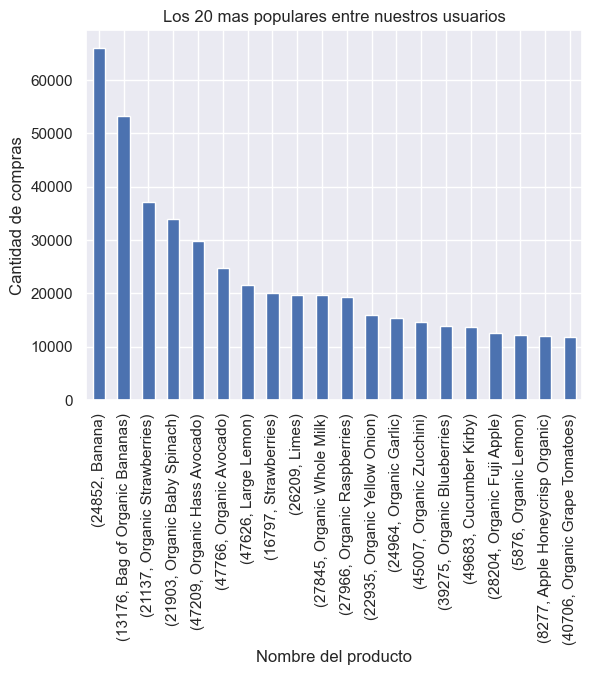

In [106]:
top_20.head(20).plot(kind="bar", x="product_name", y= "count", title="Los 20 mas populares entre nuestros usuarios", xlabel="Nombre del producto",ylabel="Cantidad de compras")
plt.show()

Escribe aquí tus conclusiones

Continuan siendo los comestibles los productos mas populares

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [108]:
carlos.groupby(["product_id","product_name"])["reordered"].mean()


product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escribe aquí tus conclusiones

Se debe hacer un analissi individual de los productos pero se observa que hay productos que son mas populares que otros, dando lugar a crecimiento de potencial clientes, 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
#group by client, 
carlos.groupby(["user_id"])["reordered"].mean()


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

igualmente es necesario hacer una analisis individual o un promedio de la proporcion, pero se observan clientes leales a productos y areas de crecimiento para aumentar la fidelidad de los clientes 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
#carlos.groupby(["product_id","product_name"])["add_to_cart_order"].min().sort_values().head(20)

In [ ]:
#venti= carlos.groupby(["product_id","product_name"])["add_to_cart_order"].min().sort_values(ascending=False)
#venti.groupby(["product_id","product_name"]).value_counts().head(25)

product_id  product_name                 add_to_cart_order
24852       Banana                       1                    15562
13176       Bag of Organic Bananas       1                    11026
27845       Organic Whole Milk           1                     4363
21137       Organic Strawberries         1                     3946
47209       Organic Hass Avocado         1                     3390
21903       Organic Baby Spinach         1                     3336
47766       Organic Avocado              1                     3044
19660       Spring Water                 1                     2336
16797       Strawberries                 1                     2308
27966       Organic Raspberries          1                     2024
44632       Sparkling Water Grapefruit   1                     1914
49235       Organic Half & Half          1                     1797
47626       Large Lemon                  1                     1737
196         Soda                         1               

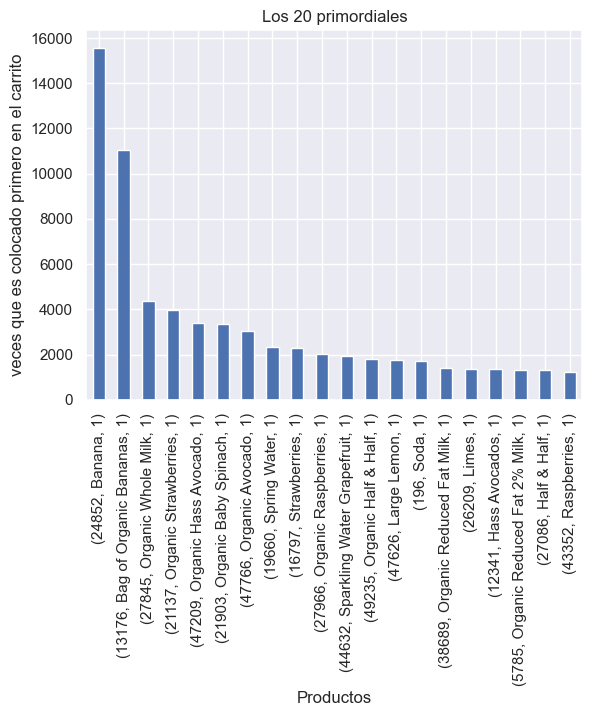

In [63]:
venti = carlos[carlos["add_to_cart_order"]==1].groupby(["product_id","product_name"])["add_to_cart_order"].value_counts().sort_values(ascending=False).head(20)
print(venti)
venti.plot(kind="bar",title="Los 20 primordiales",xlabel="Productos", ylabel="veces que es colocado primero en el carrito")
plt.show()

Escribe aquí tus conclusiones

A raiz de este analisis, y corroborando con los productos populares se observa que la sfrutas y verduras suelen ser los primeros en estar en los carritos 

### Conclusion general del proyecto:

Se detectan areas de oportunidad en el sistema, tambien se observa que los clientes compran semanal o mensualmente. las comrpas son principalmente alimentos, se podria afirmar que dependiendo de los habitos de consumo, los clientes suelen acudir en busqueda de reabastecer la alacena y alimentos. 

Seria interesante realizar otros analisis como ver si existen diferentecias en las dendencias de comrpa de productos especificos entre los usuarios que compran semanal vs los que compran mensualemnte. 

